In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import math

In [2]:
# Pure
file_path_totals_1 = '/home/mremington/Documents/sensitivity_data/total_data/pure/pure_totals_1.csv'
total_1 = pd.read_csv(file_path_totals_1,header = 0, index_col=None)
file_path_totals_2 = '/home/mremington/Documents/sensitivity_data/total_data/pure/pure_totals_2.csv'
total_2 = pd.read_csv(file_path_totals_2,header = 0, index_col=None)
file_path_totals_3 = '/home/mremington/Documents/sensitivity_data/total_data/pure/pure_totals_2.csv'
total_3 = pd.read_csv(file_path_totals_2,header = 0, index_col=None)
pure_totals = total_1.append(total_2)
pure_totals = pure_totals.append(total_3)

In [3]:
# mixed
file_path_totals_1 = '/home/mremington/Documents/sensitivity_data/total_data/mixed/mixed_totals_1.csv'
total_1 = pd.read_csv(file_path_totals_1,header = 0, index_col=None)
file_path_totals_2 = '/home/mremington/Documents/sensitivity_data/total_data/mixed/mixed_totals_2.csv'
total_2 = pd.read_csv(file_path_totals_2,header = 0, index_col=None)
file_path_totals_3 = '/home/mremington/Documents/sensitivity_data/total_data/mixed/mixed_totals_2.csv'
total_3 = pd.read_csv(file_path_totals_2,header = 0, index_col=None)
mixed_totals = total_1.append(total_2)
mixed_totals = mixed_totals.append(total_3)

In [53]:
def exp_names(file_name_column):
    labels = []
    for i in file_name_column:
        label = i.split("_sim")
        labels.append(label[0])
    return labels

def org_label(generations):
    orgs = []
    for i in generations:
        if i==9998:
            org='krat'
        elif i==1666:
            org='snake'
        orgs.append(org)
    return orgs
# pure
pure_totals['Experiment']=exp_names(pure_totals['file_name'])
pure_totals['Organism']=org_label(pure_totals['generations'])
# mixed
mixed_totals['Experiment']=exp_names(mixed_totals['file_name'])
mixed_totals['Organism']=org_label(mixed_totals['generations'])
pure_totals['trait_type']=['Pure' for i in range(len(pure_totals))]
mixed_totals['trait_type']=['Mixed' for i in range(len(mixed_totals))]
pure_totals['mean_open_pref'] = [1-x for x in list(pure_totals['mean_bush_pref'])]
mixed_totals['mean_open_pref'] = [1-x for x in list(mixed_totals['mean_bush_pref'])]

In [15]:
#totals = pure_totals.append(mixed_totals)


In [16]:
totals.head()

,sim_id,file_name,experiment,sim_number,data_type,cycles,generations,mean_bush_pref,std_bush_pref,se_bush_pref,exp_labels,org,trait_type,mean_open_pref
0,b9b9b57bc1e04c8cbd3b7c0a48306dd5,landscape_size_x_15_sim_0_krat_info.csv,landscape,0,krat,499950,9998,0.514422,0.499792,0.000334,landscape_size_x_15,krat,Pure,0.485578
1,b9b9b57bc1e04c8cbd3b7c0a48306dd5,landscape_size_x_15_sim_0_snake_info.csv,landscape,0,snake,499950,1666,0.486689,0.499823,0.000703,landscape_size_x_15,snake,Pure,0.513311
2,6e6f21bcd1554de481c540f164e4ab70,landscape_size_x_15_sim_1_krat_info.csv,landscape,1,krat,499950,9998,0.483942,0.499742,0.000336,landscape_size_x_15,krat,Pure,0.516058
3,6e6f21bcd1554de481c540f164e4ab70,landscape_size_x_15_sim_1_snake_info.csv,landscape,1,snake,499950,1666,0.506461,0.499959,0.000703,landscape_size_x_15,snake,Pure,0.493539
4,3f4752b6d29f46c2bd5385981cc90796,landscape_size_x_15_sim_2_krat_info.csv,landscape,2,krat,499950,9998,0.507132,0.499949,0.000333,landscape_size_x_15,krat,Pure,0.492868


In [13]:
bp_df = totals.groupby(['trait_type', 'exp_labels','org']).agg(
    Bush=pd.NamedAgg(column='mean_bush_pref', aggfunc='mean'),
    exp_std_bp=pd.NamedAgg(column='mean_bush_pref', aggfunc='std'),
    exp_se_bp=pd.NamedAgg(column='mean_bush_pref', aggfunc='sem')
    )
#bp_df = bp_df.reset_index()
open_preference = [1-x for x in list(bp_df['Bush'])]
bp_df['Open'] = open_preference
bp_df = bp_df.unstack(level=-1)
bp_df=bp_df.reset_index()
bp_df.columns=['Trait_Type','Experimental_Group','krat_bush','snake_bush','krat_std','snake_std','krat_se','snake_se','krat_open','snake_open']
#bp_df.set_index('Experimental_Group', inplace=True)
# bp_df = bp_df[['krat_bush', 'krat_open',
#                'snake_bush', 'snake_open', 
#                'krat_std', 'krat_se', 
#                'snake_std', 'snake_se']]#.head(50)
#print(bp_df.round(4).to_latex()) 
bp_df.head()

,Trait_Type,Experimental_Group,krat_bush,snake_bush,krat_std,snake_std,krat_se,snake_se,krat_open,snake_open
0,Mixed,initial_krat_pop_480,0.495134,0.496430,0.024979,0.012074,0.004561,0.002204,0.504866,0.503570
1,Mixed,initial_krat_pop_490,0.500997,0.498712,0.023718,0.011976,0.004330,0.002187,0.499003,0.501288
2,Mixed,initial_krat_pop_510,0.499129,0.499526,0.018192,0.009630,0.003321,0.001758,0.500871,0.500474
3,Mixed,initial_krat_pop_520,0.497383,0.499344,0.024049,0.012443,0.004391,0.002272,0.502617,0.500656
4,Mixed,initial_snake_pop_110,0.505421,0.504223,0.021346,0.010233,0.006750,0.003236,0.494579,0.495777


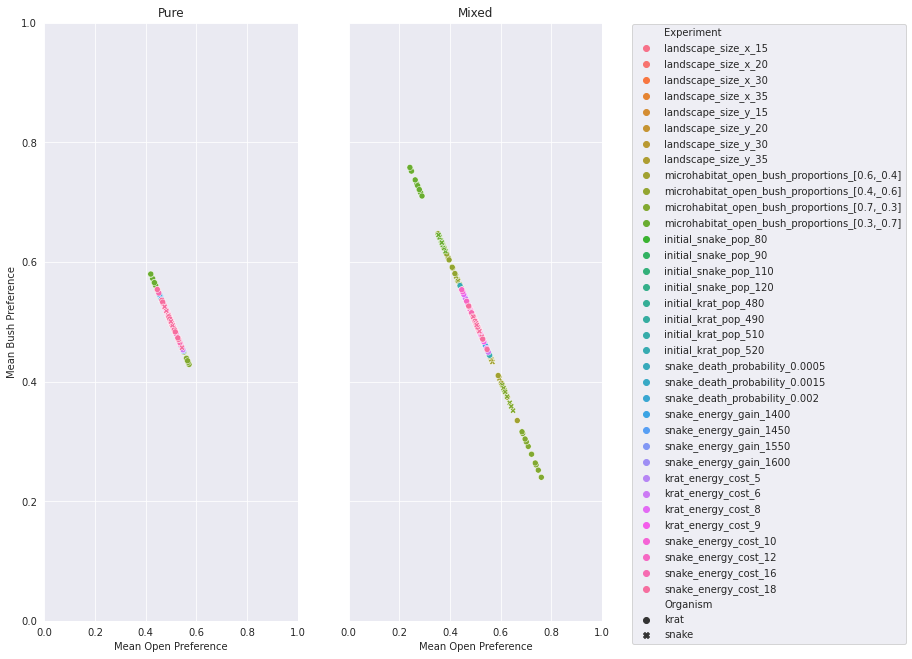

In [60]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,11))


sns.scatterplot(ax=axes[0], data=pure_totals,
                x="mean_open_pref", y="mean_bush_pref",
                style="Organism", hue="Experiment").set(title='Pure',
                                                   ylabel = "Mean Bush Preference",
                                                   xlabel = "Mean Open Preference",
                                                   xlim=(0, 1),
                                                   ylim=(0,1))
axes[0].legend_.remove()
sns.scatterplot(ax=axes[1],data=mixed_totals,
                x="mean_open_pref", y="mean_bush_pref",
                style="Organism", hue="Experiment").set(title='Mixed',
                                                   ylabel = "Mean Bush Preference",
                                                   xlabel = "Mean Open Preference",
                                                   xlim=(0, 1),
                                                   ylim=(0,1))
axes[1].legend(bbox_to_anchor=(2.2, 1),loc='upper right', borderaxespad=0.1)
plt.savefig('/home/mremington/Documents/uumarrty_post_sim/uumarrty_post_sim_analysis/images/figs/sensitivity.png')

In [14]:
bp_df.head(50)

NameError: name 'bp_df' is not defined

In [13]:
bp_df_mixed = mixed_totals.groupby(['exp_labels','org']).agg(
    Bush=pd.NamedAgg(column='mean_bush_pref', aggfunc='mean'),
    exp_std_bp=pd.NamedAgg(column='mean_bush_pref', aggfunc='std')
    exp_se_bp=pd.NamedAgg(column='mean_bush_pref', aggfunc='sem')
    )
#bp_df = bp_df.reset_index()
open_preference = [1-x for x in list(bp_df_mixed['Bush'])]
bp_df_mixed['Open']= open_preference
bp_df_mixed = bp_df_mixed.unstack(level=-1)
bp_df_mixed=bp_df_mixed.reset_index()
#bp_df_mixed.columns=['Experimental_Group','krat_bush','snake_bush','krat_se','snake_se','krat_open','snake_open']
#bp_df_mixed.set_index('Experimental_Group', inplace=True)
bp_df_mixed.head(50)

SyntaxError: invalid syntax (<ipython-input-13-674db71e759f>, line 4)